In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imutils
import random
import pickle

#import ML libraries and framework
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array

# model and layers
from keras.models import Sequential
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K


Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [2]:
# Define the dataset path and other constants.
EPOCHS = 10
LEARNING_RATE = 0.01 # default value for Adam Optimizer
BATCH_SIZE = 32
IMAGE_DIMENSIONS = (150, 150, 3)
DATASET_DIR = 'dataset'
DATASET_NAME = 'multi-label-dataset'
CURR_DIR = os.getcwd()
#TRAIN_CSV = 'train.csv'
#LABEL_DICT = {'dmg': 'damage', 'whl': 'whole', 'mnr': 'minor', 'mod': 'moderate', 'svr': 'severe', 'frt': 'front', 'rr': 'rear', 'sd': 'side'}
SUB_FOLDERS = ['damage', 'whole']

print(CURR_DIR)

/Users/ravisher/Development/FatehLabs/AIDD-Project/Damage-Whole-Classifier


In [3]:
images = []
for folder in SUB_FOLDERS:
    dataset_path = os.path.join(CURR_DIR, DATASET_DIR, folder)
    print('Dataset path: ', dataset_path)
    for file in os.listdir(dataset_path):
        images.append(os.path.join(dataset_path, file))
print(len(images))

Dataset path:  /Users/ravisher/Development/FatehLabs/AIDD-Project/Damage-Whole-Classifier/dataset/damage
Dataset path:  /Users/ravisher/Development/FatehLabs/AIDD-Project/Damage-Whole-Classifier/dataset/whole
1840


/Users/ravisher/Development/FatehLabs/AIDD-Project/Damage-Whole-Classifier/dataset/whole/0846.JPEG


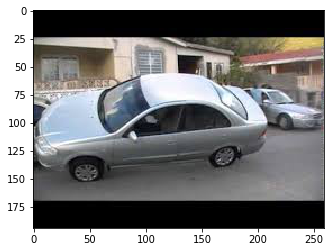

/Users/ravisher/Development/FatehLabs/AIDD-Project/Damage-Whole-Classifier/dataset/damage/0404.JPEG


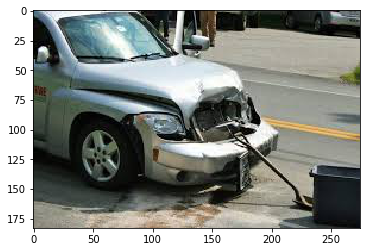

/Users/ravisher/Development/FatehLabs/AIDD-Project/Damage-Whole-Classifier/dataset/whole/0254.jpg


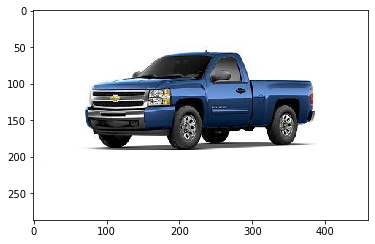

/Users/ravisher/Development/FatehLabs/AIDD-Project/Damage-Whole-Classifier/dataset/damage/0815.JPEG


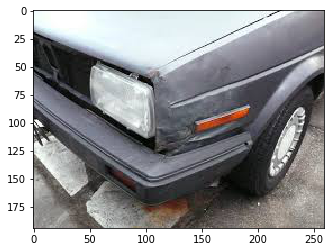

In [5]:
random.seed(42)
random.shuffle(images)
import matplotlib.image as mpimg
for img in images[:4]:
    print(img)
    image = mpimg.imread(img)
    implot = plt.imshow(image)
    plt.show()

In [6]:
from keras.preprocessing.image import img_to_array
data = []
labels = []
for img in images:
    # load the image, pre-process it and store it in the data list    
    image = cv2.imread(img)    
    image = cv2.resize(image, (IMAGE_DIMENSIONS[1], IMAGE_DIMENSIONS[0]))
    image = img_to_array(image)
    data.append(image)
    label = img.split(os.path.sep)[-2]
    label = 1 if label == 'damage' else 0
    labels.append(label)

In [7]:
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)
print('Image Shape: ', data.shape)
print('Label Shape: ', labels.shape)

Image Shape:  (1840, 150, 150, 3)
Label Shape:  (1840,)


In [8]:
# Training Testing Split
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [30]:
# # Build the model
# def build(width, height, depth, classes, final_act="softmax"):
#         # initialize the model along with the input shape
#         model = Sequential()
#         inputShape = (height, width, depth)
#         channel_dim = -1

#         if K.image_data_format() == "channels_first":
#             inputShape = (depth, height, width)
#             channel_dim = 1

#         # CONV => RELU => POOL
#         model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization(axis=channel_dim))
#         model.add(MaxPooling2D(pool_size=(3, 3)))
#         model.add(Dropout(0.25))

# 	# (CONV => RELU) * 2 => POOL
#         model.add(Conv2D(64, (3, 3), padding="same"))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization(axis=channel_dim))
#         model.add(Conv2D(64, (3, 3), padding="same"))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization(axis=channel_dim))
#         model.add(MaxPooling2D(pool_size=(2, 2)))
#         model.add(Dropout(0.25))

# 	# (CONV => RELU) * 2 => POOL
#         model.add(Conv2D(128, (3, 3), padding="same"))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization(axis=channel_dim))
#         model.add(Conv2D(128, (3, 3), padding="same"))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization(axis=channel_dim))
#         model.add(MaxPooling2D(pool_size=(2, 2)))
#         model.add(Dropout(0.25))

#         #FC => RELU layers
#         model.add(Flatten())
#         model.add(Dense(1024))
#         model.add(Activation("relu"))
#         model.add(BatchNormalization())
#         model.add(Dropout(0.5))

# 	    # use a *softmax* activation for single-label classification
# 	    # and *sigmoid* activation for multi-label classification
#         model.add(Dense(classes))
#         model.add(Activation(final_act))

# 	    # return the constructed network architecture
#         return model

In [10]:
# Build and compile the model
# model = Sequential()
# model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
# model.add(layers.MaxPool2D(2,2))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPool2D(2, 2))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPool2D(2, 2))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPool2D(2, 2))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(1, activation='softmax'))

model = Sequential()
inputShape = (150, 150, 3)
channel_dim = -1

# if K.image_data_format() == "channels_first":
#     inputShape = (depth, height, width)
#     channel_dim = 1

# CONV => RELU => POOL
model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=channel_dim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=channel_dim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=channel_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=channel_dim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=channel_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#FC => RELU layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# use a *softmax* activation for single-label classification
# and *sigmoid* activation for multi-label classification
model.add(Dense(1))
model.add(Activation("sigmoid"))

#model = build(width=IMAGE_DIMENSIONS[1], height=IMAGE_DIMENSIONS[0], depth=IMAGE_DIMENSIONS[2], classes=2, final_act="softmax")
opt = Adam(lr=LEARNING_RATE, decay=LEARNING_RATE/EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
print(model.summary())

W1124 22:49:46.644906 4439741888 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1124 22:49:47.428013 4439741888 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 50, 50, 64)       

In [11]:
# Training Starts
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BATCH_SIZE), validation_data=(testX, testY),
                        steps_per_epoch=len(trainX) // BATCH_SIZE, epochs=EPOCHS, verbose=1)

W1124 22:49:58.351267 4439741888 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/10
46/46 [==============================] - 140s 3s/step - loss: 1.4453 - accuracy: 0.5245 - val_loss: 7.2233 - val_accuracy: 0.5272
Epoch 2/10
46/46 [==============================] - 139s 3s/step - loss: 0.9093 - accuracy: 0.5747 - val_loss: 1.8173 - val_accuracy: 0.5408
Epoch 3/10
46/46 [==============================] - 135s 3s/step - loss: 0.7796 - accuracy: 0.6311 - val_loss: 0.8946 - val_accuracy: 0.5870
Epoch 4/10
46/46 [==============================] - 131s 3s/step - loss: 0.8130 - accuracy: 0.6060 - val_loss: 1.5002 - val_accuracy: 0.5543
Epoch 5/10
46/46 [==============================] - 136s 3s/step - loss: 0.7618 - accuracy: 0.6352 - val_loss: 0.6712 - val_accuracy: 0.6603
Epoch 6/10
46/46 [==============================] - 124s 3s/step - loss: 0.7488 - accuracy: 0.6433 - val_loss: 1.0344 - val_accuracy: 0.5951
Epoch 7/10
46/46 [==============================] - 128s 3s/step - loss: 0.7784 - accuracy: 0.6264 - val_loss: 0.7115 - val_accuracy: 0.6277
Epoch 8/10
46

In [15]:
model.save_weights('car-damage-whole-weights.h5')
model.save('car-damage-whole-model.h5')
# # save the multi-label binarizer to disk
# print("[INFO] serializing label binarizer...")
# f = open(os.path.join(CURR_DIR, 'pickle'), "wb")
# f.write(pickle.dumps(mlb))
# f.close()

[INFO] serializing label binarizer...


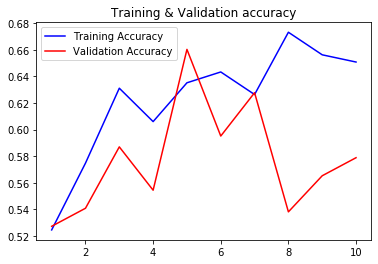

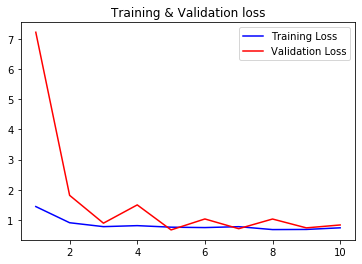

In [12]:
# plot train and val curve
acc = H.history['accuracy']
loss = H.history['loss']

val_acc = H.history['val_accuracy']
val_loss = H.history['val_loss']

epochs = range(1, len(acc) + 1)

# Training and Validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training & Validation accuracy')
plt.legend()

plt.figure()

# Training and Validation Loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training & Validation loss')
plt.legend()

plt.show()

Probs: [0.34618208]
Probs: [0.71107715]
Probs: [0.10383914]
Probs: [0.8193845]
Probs: [0.01720449]
Probs: [0.20632645]
Probs: [0.04496142]
Probs: [0.4549261]
Probs: [0.13871495]
Probs: [0.12277292]
Probs: [0.11638531]
Probs: [0.0410204]
Probs: [0.17742965]
Probs: [0.17693602]
Probs: [0.49803448]


ValueError: num must be 1 <= num <= 16, not 17

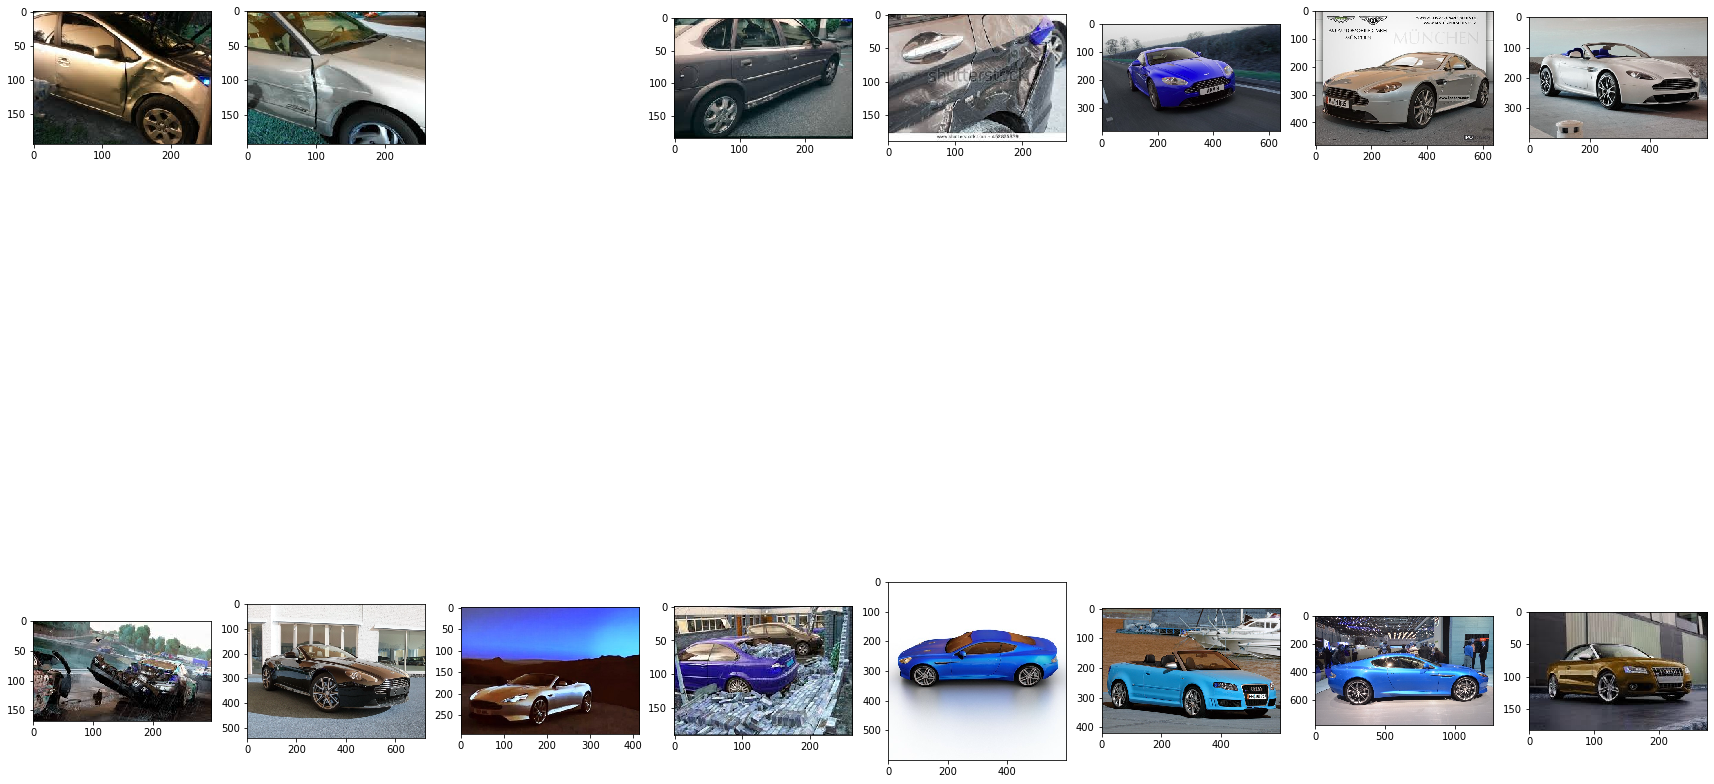

In [15]:
test_dir=os.path.join('/Users/ravisher/Desktop', 'test-set-cars')
test_images = [os.path.join(test_dir, i) for i in os.listdir(test_dir)]
plt.figure(figsize=(30, 20))
columns = 8
for (i, img) in enumerate(test_images):
    image = cv2.imread(img)
    if image is not None:
        output = imutils.resize(image, width=400)
        plt.subplot(8 / columns + 1, columns, i + 1)
        imgplot = plt.imshow(image)
        # pre-process the image for classification
        image = cv2.resize(image, (150, 150))
        image = img_to_array(image)
        image = image.astype("float") / 255.0
        image = np.expand_dims(image, axis=0)
        proba = model.predict(image)[0]
        print('Probs:', proba)
plt.show()